# Range Expansion Index

https://www.linnsoft.com/techind/demark-range-expansion-index

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

import yfinance as yf
yf.pdr_override()

In [2]:
# input
symbol = 'AAPL'
start = '2018-09-01'
end = '2019-01-01'

# Read data 
df = yf.download(symbol,start,end)

# View Columns
df.head()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-09-04,57.102501,57.294998,56.657501,57.090000,54.461605,109560400
2018-09-05,57.247501,57.417500,56.275002,56.717499,54.106262,133332000
2018-09-06,56.557499,56.837502,55.325001,55.775002,53.207172,137160000
2018-09-07,55.462502,56.342499,55.177502,55.325001,52.777882,150479200
2018-09-10,55.237499,55.462502,54.117500,54.582500,52.069565,158066000


In [3]:
# Settings
REIPeriod = 8

# Calculate differences
df['diff1'] = df['High'] - df['High'].shift(2)
df['diff2'] = df['Low'] - df['Low'].shift(2)

# Conditions for numzero1
df['numzero1'] = np.where((df['High'].shift(2) < df['Close'].shift(7)) & 
                          (df['High'].shift(2) < df['Close'].shift(8)) & 
                          (df['High'] < df['High'].shift(5)) & 
                          (df['High'] < df['High'].shift(6)), 0, 1)

# Conditions for numzero2
df['numzero2'] = np.where((df['Low'].shift(2) > df['Close'].shift(7)) & 
                          (df['Low'].shift(2) > df['Close'].shift(8)) & 
                          (df['Low'] > df['Low'].shift(5)) & 
                          (df['Low'] > df['Low'].shift(6)), 0, 1)

# Calculate subvalue
df['subvalue'] = df['numzero1'] * df['numzero2'] * (df['diff1'] + df['diff2'])

# Calculate AbsDailyValue
df['AbsDailyValue'] = abs(df['diff1']) + abs(df['diff2'])

# Initialize lists to store sum of subvalues and AbsDailyValues
SubValueSum = []
AbsDailyValueSum = []

for i in range(len(df)):
    if i < REIPeriod:
        SubValueSum.append(np.nan)
        AbsDailyValueSum.append(np.nan)
    else:
        SubValueSum.append(df['subvalue'].iloc[i-REIPeriod+1:i+1].sum())
        AbsDailyValueSum.append(df['AbsDailyValue'].iloc[i-REIPeriod+1:i+1].sum())

df['SubValueSum'] = SubValueSum
df['AbsDailyValueSum'] = AbsDailyValueSum

# Calculate REI
df['REI'] = np.where(df['AbsDailyValueSum'] != 0, (df['SubValueSum'] / df['AbsDailyValueSum']) * 100, 0)

In [4]:
df.head()

,Open,High,Low,Close,Adj Close,Volume,diff1,diff2,numzero1,numzero2,subvalue,AbsDailyValue,SubValueSum,AbsDailyValueSum,REI
Date,,,,,,,,,,,,,,,
2018-09-04,57.102501,57.294998,56.657501,57.090000,54.461605,109560400,NaN,NaN,1,1,NaN,NaN,NaN,NaN,NaN
2018-09-05,57.247501,57.417500,56.275002,56.717499,54.106262,133332000,NaN,NaN,1,1,NaN,NaN,NaN,NaN,NaN
2018-09-06,56.557499,56.837502,55.325001,55.775002,53.207172,137160000,-0.457497,-1.3325,1,1,-1.789997,1.789997,NaN,NaN,NaN
2018-09-07,55.462502,56.342499,55.177502,55.325001,52.777882,150479200,-1.075001,-1.0975,1,1,-2.172501,2.172501,NaN,NaN,NaN
2018-09-10,55.237499,55.462502,54.117500,54.582500,52.069565,158066000,-1.375000,-1.2075,1,1,-2.582500,2.582500,NaN,NaN,NaN


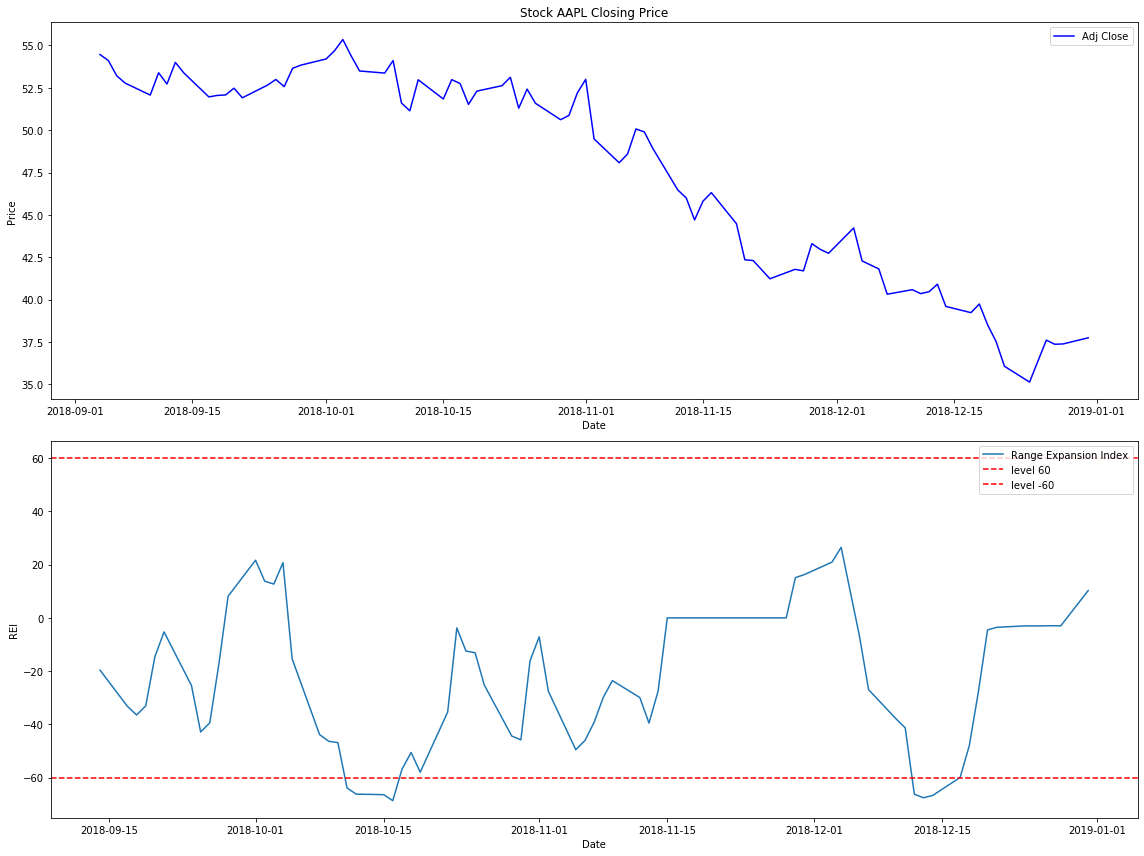

In [5]:
fig = plt.figure(figsize=(16, 12))
ax1 = plt.subplot(2, 1, 1)
ax1.plot(df['Adj Close'], label='Adj Close', color='blue')
ax1.set_title('Stock ' + symbol + ' Closing Price')
ax1.legend(loc='best')
ax1.set_ylabel('Price')
ax1.set_xlabel('Date')

ax2 = plt.subplot(2, 1, 2)
ax2.plot(df['REI'], label='Range Expansion Index')
ax2.axhline(y=60, color='r', linestyle='--', label='level 60')
ax2.axhline(y=-60, color='r', linestyle='--', label='level -60')
ax2.set_ylabel('REI')
ax2.set_xlabel('Date')
ax2.legend(loc='best')

plt.tight_layout()
plt.show()

## Candlestick with Range Expansion Index

In [6]:
from matplotlib import dates as mdates
import datetime as dt

dfc = df.copy()
dfc['VolumePositive'] = dfc['Open'] < dfc['Adj Close']
#dfc = dfc.dropna()
dfc = dfc.reset_index()
dfc['Date'] = pd.to_datetime(dfc['Date'])
dfc['Date'] = dfc['Date'].apply(mdates.date2num)
dfc.head()

,Date,Open,High,Low,Close,Adj Close,Volume,diff1,diff2,numzero1,numzero2,subvalue,AbsDailyValue,SubValueSum,AbsDailyValueSum,REI,VolumePositive
0,736941.0,57.102501,57.294998,56.657501,57.090000,54.461605,109560400,NaN,NaN,1,1,NaN,NaN,NaN,NaN,NaN,False
1,736942.0,57.247501,57.417500,56.275002,56.717499,54.106262,133332000,NaN,NaN,1,1,NaN,NaN,NaN,NaN,NaN,False
2,736943.0,56.557499,56.837502,55.325001,55.775002,53.207172,137160000,-0.457497,-1.3325,1,1,-1.789997,1.789997,NaN,NaN,NaN,False
3,736944.0,55.462502,56.342499,55.177502,55.325001,52.777882,150479200,-1.075001,-1.0975,1,1,-2.172501,2.172501,NaN,NaN,NaN,False
4,736947.0,55.237499,55.462502,54.117500,54.582500,52.069565,158066000,-1.375000,-1.2075,1,1,-2.582500,2.582500,NaN,NaN,NaN,False


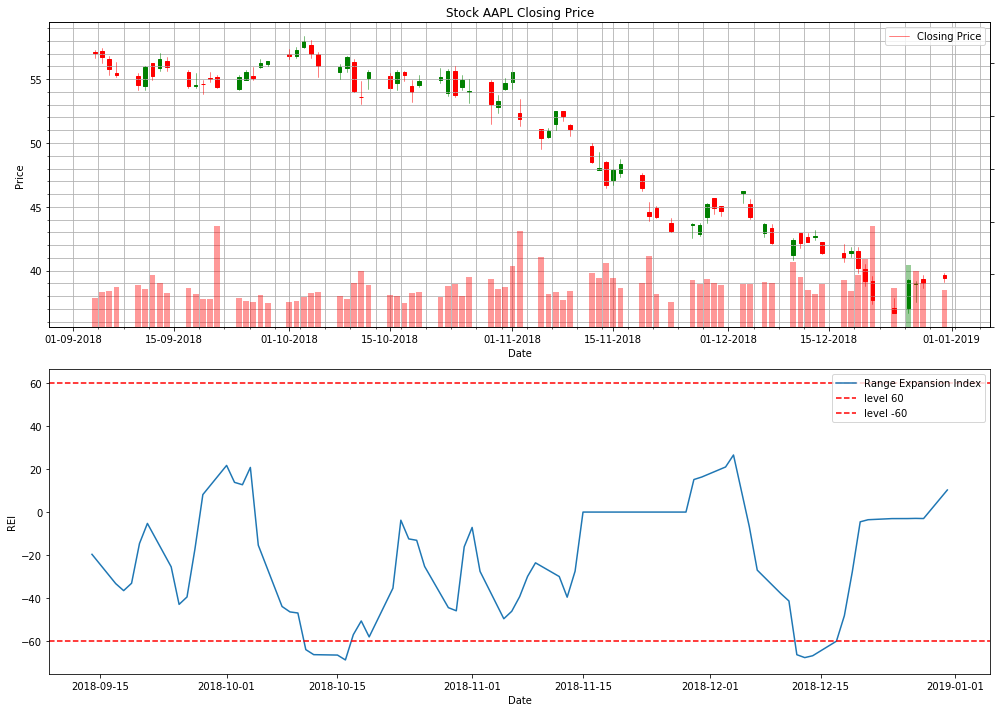

In [7]:
from mplfinance.original_flavor import candlestick_ohlc

fig = plt.figure(figsize=(14,10))
ax1 = plt.subplot(2, 1, 1)
candlestick_ohlc(ax1, dfc[['Date', 'Open', 'High', 'Low', 'Close']].values, width=0.5, colorup='g', colordown='r', alpha=1.0)
ax1.xaxis_date()
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
ax1.grid(True, which='both')
ax1.minorticks_on()
ax1v = ax1.twinx()
colors = dfc.VolumePositive.map({True: 'g', False: 'r'})
ax1v.bar(dfc.Date, dfc['Volume'], color=colors, alpha=0.4)
ax1v.axes.yaxis.set_ticklabels([])
ax1v.set_ylim(0, 3 * dfc.Volume.max())
ax1.set_title('Stock ' + symbol + ' Closing Price')
ax1.set_ylabel('Price')
ax1.set_xlabel('Date')
ax1.legend(['Closing Price'], loc='best')

ax2 = plt.subplot(2, 1, 2)
ax2.plot(df['REI'], label='Range Expansion Index')
ax2.axhline(y=60, color='r', linestyle='--', label='level 60')
ax2.axhline(y=-60, color='r', linestyle='--', label='level -60')
ax2.set_ylabel('REI')
ax2.set_xlabel('Date')
ax2.legend(loc='best')

plt.tight_layout()
plt.show()

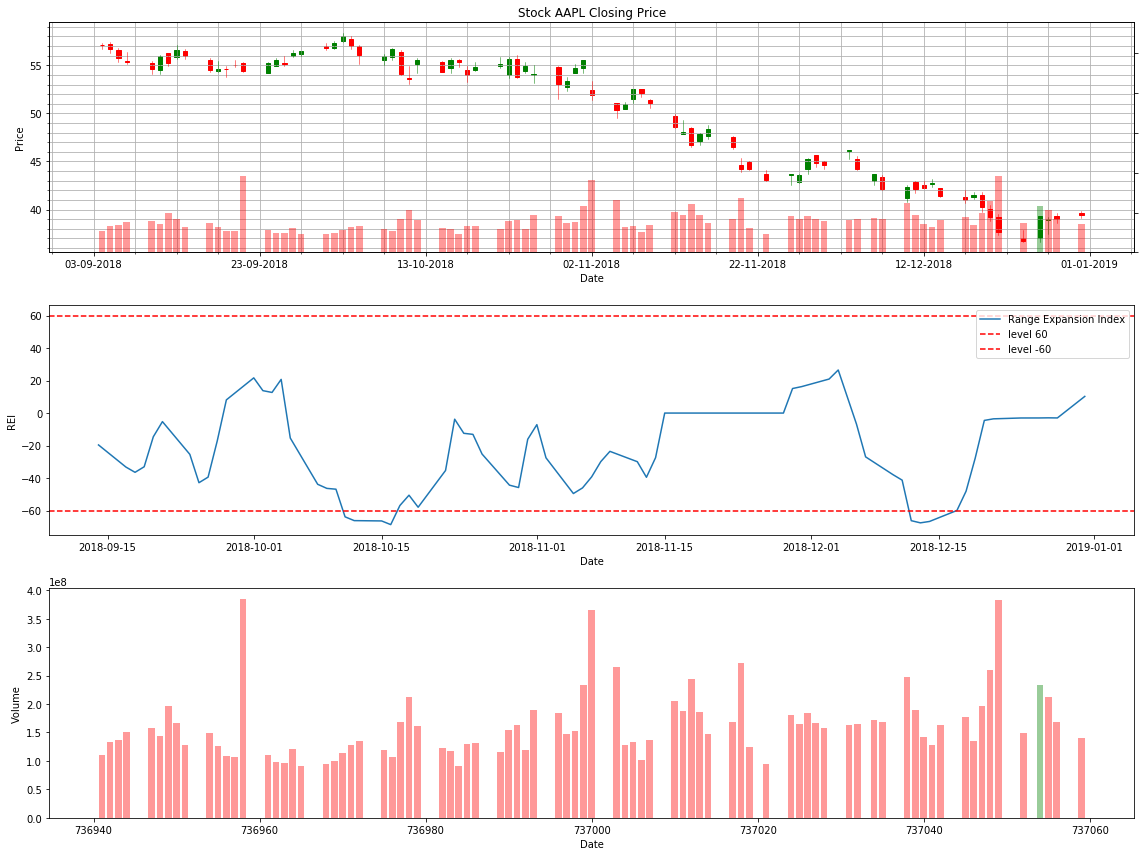

In [8]:
fig = plt.figure(figsize=(16,12))
ax1 = plt.subplot(3, 1, 1)
candlestick_ohlc(ax1,dfc.values, width=0.5, colorup='g', colordown='r', alpha=1.0)
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
ax1.grid(True, which='both')
ax1.minorticks_on()
ax1v = ax1.twinx()
colors = dfc.VolumePositive.map({True: 'g', False: 'r'})
ax1v.bar(dfc.Date, dfc['Volume'], color=colors, alpha=0.4)
ax1v.axes.yaxis.set_ticklabels([])
ax1v.set_ylim(0, 3*df.Volume.max())
ax1.set_title('Stock '+ symbol +' Closing Price')
ax1.set_ylabel('Price')
ax1.set_xlabel('Date')

ax2 = plt.subplot(3, 1, 2)
ax2.plot(df['REI'], label='Range Expansion Index')
ax2.axhline(y=60, color='r', linestyle='--', label='level 60')
ax2.axhline(y=-60, color='r', linestyle='--', label='level -60')
ax2.set_ylabel('REI')
ax2.set_xlabel('Date')
ax2.legend(loc='best')

ax3 = plt.subplot(3, 1, 3)
colors = dfc.VolumePositive.map({True: 'g', False: 'r'})
ax3.bar(dfc.Date, dfc['Volume'], color=colors, alpha=0.4)
ax3.set_ylabel('Volume')
ax3.set_xlabel('Date')

plt.tight_layout()
plt.show()